# Exercise Sheet 02: Principal Component Analysis, Factor Analysis, K-Means, and Gaussian Mixture Models

**Introduction to Data Mining WS23/24**  
**Bielefeld University**  
**Alina Deriyeva, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2023-11-06**  
**Exercise Sheet Submission Deadline: Friday, 2023-11-17, noon (i.e. 12:00), via Moodle.**

**NOTE** The use of language models/AI tools is permitted IF you notify us of the use (just indicate it in the respective task) and are still able to understand and present your results. We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool so that we can understand better how students tend to use these tools.

**PLEASE INDICATE ALL AUTHORS OF THE SUBMISSION IN THIS FIELD**

## Preamble: Data set

The file `sheet02_data.csv` contains fictional data as you might find in an online course. Each row represents a student, each column a feature of the student's activity in the course, namely their number of posts in the course discussion forum, the number of questions they asked in chat during the online lectures, the number of messages they sent to their peers, and the number of points they achieved in each of the five exercises of the course.

Note that there is quite a bit of missing data for later exercises because many students dropped out of the course early.

The following line loads this raw data and prints it.

In [49]:
import numpy as np
import matplotlib.pyplot as plt

features = ['num_forum_postings',
    'num_questions',
    'num_messages',
    'num_completed_tasks',
    'points_exercise_1',
    'points_exercise_2',
    'points_exercise_3',
    'points_exercise_4',
    'points_exercise_5']

X = np.loadtxt('sheet02_data.csv', skiprows = 1, delimiter = '\t')
print(X)

[[ 3.  1.  1. ... 56. 61. 60.]
 [ 0.  0.  0. ... nan nan nan]
 [ 7.  3.  2. ... 66. 57. nan]
 ...
 [ 0.  0.  0. ... 30. nan nan]
 [ 1.  0.  0. ... nan nan nan]
 [ 3.  0.  1. ... 40. 35. 40.]]


### Task 02.01

Our first challenge is to impute the missing data. Fill in missing values with the mean points the respective student got on the other exercises. For students with no completed exercises, fill in zeros.

In [50]:
# create a mask of the missing values
mask = np.isnan(X)

# create an empty array with the same shape as the original array
X_imputed = np.zeros_like(X)

# loop over the rows of the original array
for i in range(X.shape[0]):
    # get the mean points of the completed exercises for the current student
    mean_points = np.nanmean(X[i, 4:])
    # if the mean points is not a number, it means the student has no completed exercises
    if np.isnan(mean_points):
        # fill in zeros for the exercise columns
        X_imputed[i, 4:] = 0
    else:
        # fill in the mean points for the missing values in the exercise columns
        '''
# an array of numbers
x = np.array([1, 2, 3, 4, 5])

# an array of booleans
y = np.array([True, False, True, False, True])

# an array of letters
z = np.array(['a', 'b', 'c', 'd', 'e'])

The np.where function creates a new array that has the values of x where y is True, and the values of z where y is False. For example:

# use the np.where function with the three inputs. In y are the true or false values deciding if x or z is used. x is used when true and z when false.
w = np.where(y, x, z)

# print the result
print(w)      

['1' 'b' '3' 'd' '5'
        '''
        X_imputed[i, 4:] = np.where(mask[i, 4:], mean_points, X[i, 4:])
    # copy the other columns as they are
    X_imputed[i, :4] = X[i, :4]
    
# print the imputed array with conditional formatting and fixed width
print("\n".join([" ".join(["{:>6.2f}".format(x) if x % 1 else "{:>6}".format(int(x)) for x in row]) for row in X_imputed]))

     3      1      1      5     57     58     56     61     60
     0      0      0      2     25     24  24.50  24.50  24.50
     7      3      2      4     57     63     66     57  60.75
     0      0      0      4     17     19     22     26     21
     4      0      3      5     48     45     44     45     45
     1      0      0      0      0      0      0      0      0
    11      3      4      5     48     43     42     46     43
     4      1      2      5     48     54     48     52     52
     7      2      2      5     58     59     54     58     53
     8      2      3      5     44     42     40     40     44
     4      1      0      5     32     42     38     43     37
     1      0      0      0      0      0      0      0      0
     2      2      1      5     61     59     60     59     56
     2      1      1      5     47     44     50     48     45
     1      0      0      1     26     26     26     26     26
     3      1      3      5     56     55     53     53

C:\Users\Christoph\AppData\Local\Temp\ipykernel_8700\2501999576.py:10: RuntimeWarning: Mean of empty slice
  mean_points = np.nanmean(X[i, 4:])


In [51]:
# this cell is here for test purposes. please ignore it. 

### Task 02.02

Next, normalize the data by dividing by the maximum value in each column.

In [52]:
# get the maximum value of each column
# returns the maximum value along a given axis of an array. The function np.max() takes two inputs: The array and the axis. axis=0 means the axis along which the maximum values are computed. In this case, the axis is 0, which means the columns. If the axis was 1, it would mean the rows.
max_values = np.max(X_imputed, axis=0)

# divide the array by the maximum values
# np.max() returns an array
X_normalized = np.divide(X_imputed, max_values)

# print the normalized array with conditional formatting and fixed width
print("\n".join([" ".join(["{:>6.2f}".format(x) if x % 1 else "{:>6}".format(int(x)) for x in row]) for row in X_normalized]))


  0.25   0.20   0.11      1   0.76   0.77   0.71   0.77   0.77
     0      0      0   0.40   0.33   0.32   0.31   0.31   0.31
  0.58   0.60   0.22   0.80   0.76   0.84   0.84   0.72   0.78
     0      0      0   0.80   0.23   0.25   0.28   0.33   0.27
  0.33      0   0.33      1   0.64   0.60   0.56   0.57   0.58
  0.08      0      0      0      0      0      0      0      0
  0.92   0.60   0.44      1   0.64   0.57   0.53   0.58   0.55
  0.33   0.20   0.22      1   0.64   0.72   0.61   0.66   0.67
  0.58   0.40   0.22      1   0.77   0.79   0.68   0.73   0.68
  0.67   0.40   0.33      1   0.59   0.56   0.51   0.51   0.56
  0.33   0.20      0      1   0.43   0.56   0.48   0.54   0.47
  0.08      0      0      0      0      0      0      0      0
  0.17   0.40   0.11      1   0.81   0.79   0.76   0.75   0.72
  0.17   0.20   0.11      1   0.63   0.59   0.63   0.61   0.58
  0.08      0      0   0.20   0.35   0.35   0.33   0.33   0.33
  0.25   0.20   0.33      1   0.75   0.73   0.67   0.67

In [53]:
# this cell is here for test purposes. please ignore it. 

## Principal Component Analysis

### Task 02.03

Compute the covariance matrix of the data via `np.cov` and compute the eigenvalues of the covariance matrix via `np.linalg.eigvals`. Provide a plot of the eigenvalues on the y-axis, sorted according to size (the largest eigenvalue at x=1, the second-largest on x=2, and so on).

Compute and report the percentage of variance covered by the first two eigenvalues.

**HINT:** `np.cov` treats the rows as variables and columns as observations. For our data set, rows are observations and columns are variables.

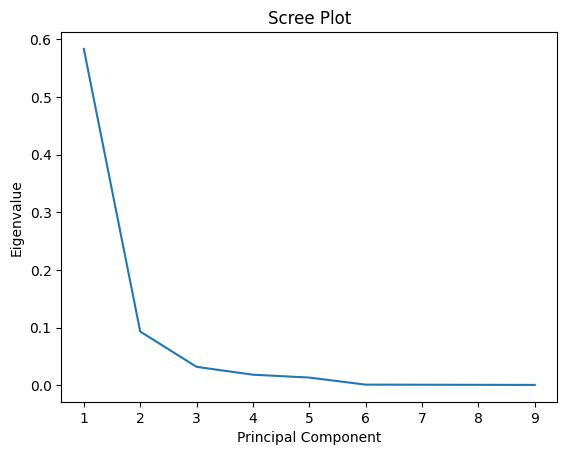

The percentage of variance covered by the first two eigenvalues is 90.90%


In [54]:
# compute the covariance matrix of the data
# The np.cov() function treats the rows as variables and columns as observations by default. However, for our data set, the rows are observations and columns are variables. need to transpose the data before passing it to the function.
cov_matrix = np.cov(X_normalized.T)

# compute the eigenvalues and eigenvectors of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

'''
The output array has the indices (0 to 4) of the sorted array in ascending order. 
a = np.array([3, 1, 4, 2, 5])
index_sorted = np.argsort(a)
print(ida)
[1 3 0 2 4]

--------------------------------------------------------------------------------------

[::-1] is a slicing operation that reverses the order of an array. It takes every element of the array from the end to the beginning with a negative step of 1. 
b = np.array([1, 2, 3, 4, 5])

b[::-1]
[5 4 3 2 1]
'''
# sort the eigenvalues and eigenvectors in descending order
index_rev_sort = np.argsort(eig_vals)[::-1]

'''
eig_vals = np.array([0.5, 1.5, 0.8, 1.2, 1.0])
index_rev_sort = np.array([1, 3, 4, 2, 0])
eig_vals = eig_vals[index_rev_sort]
print(eig_vals)
[1.5 1.2 1.  0.8 0.5]
'''
eig_vals = eig_vals[index_rev_sort]
# uses the index_rev_sort array, to sort the eigenvalues array in descending order
eig_vecs = eig_vecs[:, index_rev_sort]

# plot the eigenvalues on the y-axis, sorted according to size
plt.plot(range(1, len(eig_vals) + 1), eig_vals)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
'''
The name scree plot is common for a plot that shows the eigenvalues of a matrix in descending order.
Scree comes from the analogy of a scree slope, which is a steep slope of loose rock at the base of a cliff.
The point where the slope changes is often used as a criterion to select the number of principal components.
'''
plt.title('Scree Plot')
plt.show()


# compute the total variance explained by all the eigenvalues
'''
The total variance is the sum of the eigenvalues because the eigenvalues represent the variance explained by each principal component.
The principal components are the linear combinations of the original variables that capture the maximum amount of variation in the data. 
The covariance matrix is a square matrix that measures the linear relationship between each pair of variables in the data.
The eigenvectors are the directions of the principal components, and the eigenvalues are the magnitudes of the principal components.
The total variance of the data is equal to the trace of the covariance matrix, which is the sum of the diagonal elements. 
'''
total_variance = np.sum(eig_vals)

# compute the percentage of variance covered by the first two eigenvalues
'''
Next line computes the percentage of variance covered by the first two eigenvalues.
The eigenvalues represent the variance explained by each principal component, and the total variance is the sum of all the eigenvalues.
The percentage of variance is the ratio of the variance explained by a subset of principal components (in our case the subset are the first two with index 0 and 1) to the total variance in the data, multiplied by 100. 
'''
percentage = (eig_vals[0] + eig_vals[1]) / total_variance * 100

# report the percentage
# This is a useful measure of how much information is retained by the principal components.
print(f'The percentage of variance covered by the first two eigenvalues is {percentage:.2f}%')




In [55]:
# this cell is here for test purposes. please ignore it. 

### Task 02.04

Use the `fit` method of a `sklearn.decomposition.PCA` model to perform a principal component analysis of this data with `n_components = 2`.

Transform the data to the latent space via the `transform` function of the PCA model.

Plot the data using a 2D scatter plot.

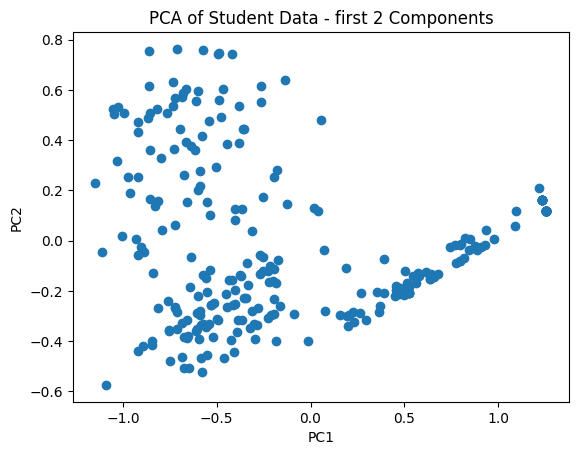

In [56]:
# The sklearn.decomposition.PCA model can perform a principal component analysis with a specified number of components.
from sklearn.decomposition import PCA

# The n_components parameter specifies the number of principal components to keep. in Our case, we want to keep 2 principal components.
pca = PCA(n_components=2)
# The fit method of the PCA model fits the model to the data.#
# This will compute the principal components and store them in the components_ attribute of the model. 
# The components_ attribute is a matrix with shape (n_components, n_features), where n_features is the number of features in the data.
pca.fit(X_normalized)

# To transform your data to the latent space, you can use the transform function of the PCA model. This will project your data onto the principal components and return a new array with two columns: one for each principal component.
# Latent space means the space of the principal components (the new space after the transformation).
X_transformed = pca.transform(X_normalized)

# first column of the transformed data are the x-coordinates and the second column are the y-coordinates. 
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Student Data - first 2 Components')
plt.show()

C:\Users\Christoph\AppData\Local\Temp\ipykernel_8700\1882290902.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap(color_maps[i])


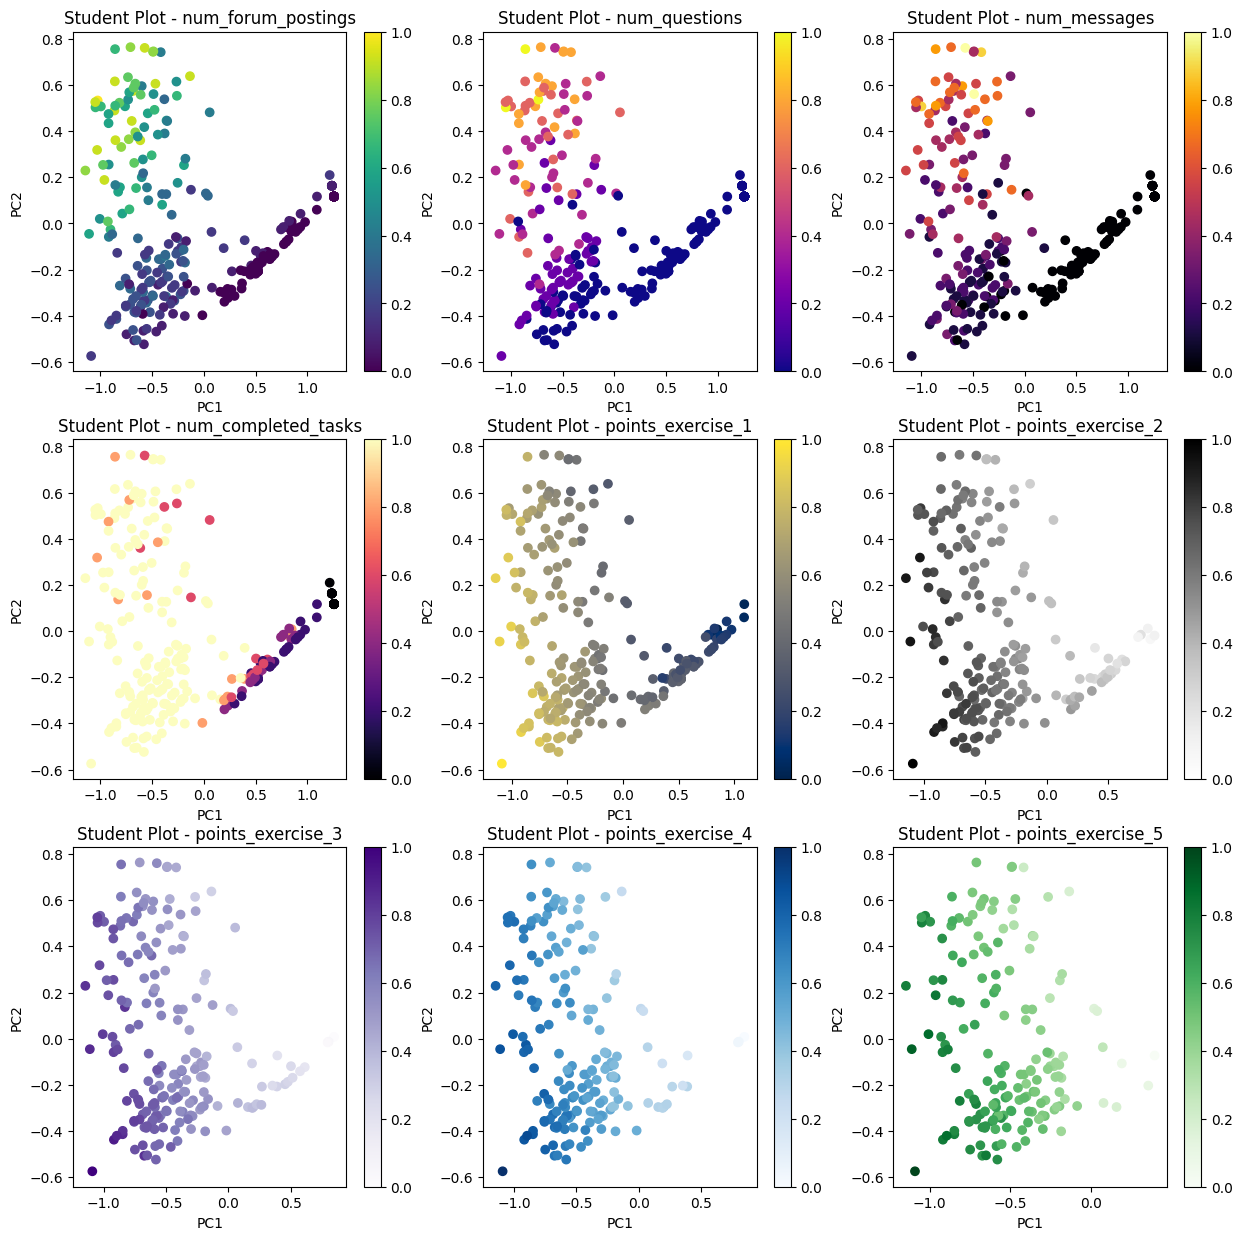

In [57]:

# create a list of color maps
color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

# create a figure with 9 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# loop over the features and the subplots
for i in range(9):
    # get the row and column index of the subplot
    row = i // 3
    col = i % 3
    # get the color values and the color map for the current feature
    color_values = X[:, i]
    color_map = plt.cm.get_cmap(color_maps[i])
    # plot the data with the color values and the color map on the subplot
    axes[row, col].scatter(X_transformed[:, 0], X_transformed[:, 1], c=color_values, cmap=color_map)
    # add a color bar to show the scale
    fig.colorbar(plt.cm.ScalarMappable(cmap=color_map), ax=axes[row, col])
    # add labels and a title to the subplot
    axes[row, col].set_xlabel('PC1')
    axes[row, col].set_ylabel('PC2')
    axes[row, col].set_title(f'Student Plot - {features[i]}')

# show the figure
plt.show()


### Task 02.05 (Bonus Task)

Compute the eigenvalue decomposition of the covariance matrix and perform PCA yourself. Only retain the two most prominent components and plot the transformed data with a 2D scatter plot. Check whether your plot is consistent with the plot above.

In [58]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [59]:
# this cell is here for test purposes. please ignore it. 

## Factor Analysis

### Task 02.06

Use the `fit` method of a `sklearn.decomposition.FactorAnalysis` model to perform a factor analysis of this data with `n_components = 2`. Use the `rotation = 'varimax'` parameter.

Transform the data to the latent space via the `transform` function of the FA model.

Plot the data using a 2D scatter plot.

Compare this plot to the plot above. What difference do you notice?

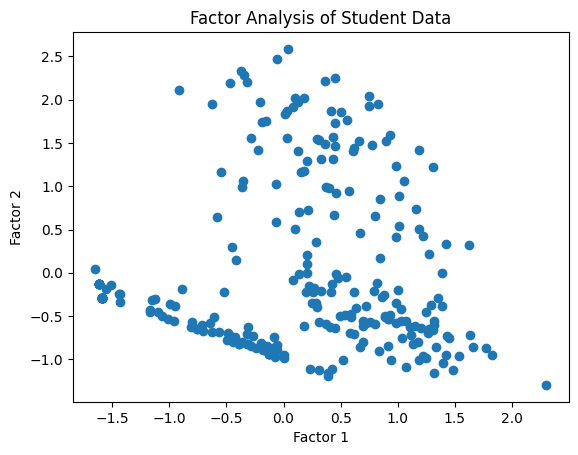

In [69]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2, rotation='varimax')
fa.fit(X_normalized)

X_transformed_fa = fa.transform(X_normalized)

plt.scatter(X_transformed_fa[:, 0], X_transformed_fa[:, 1])
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis of Student Data')
plt.show()


C:\Users\Christoph\AppData\Local\Temp\ipykernel_8700\2849056527.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap(color_maps[i])


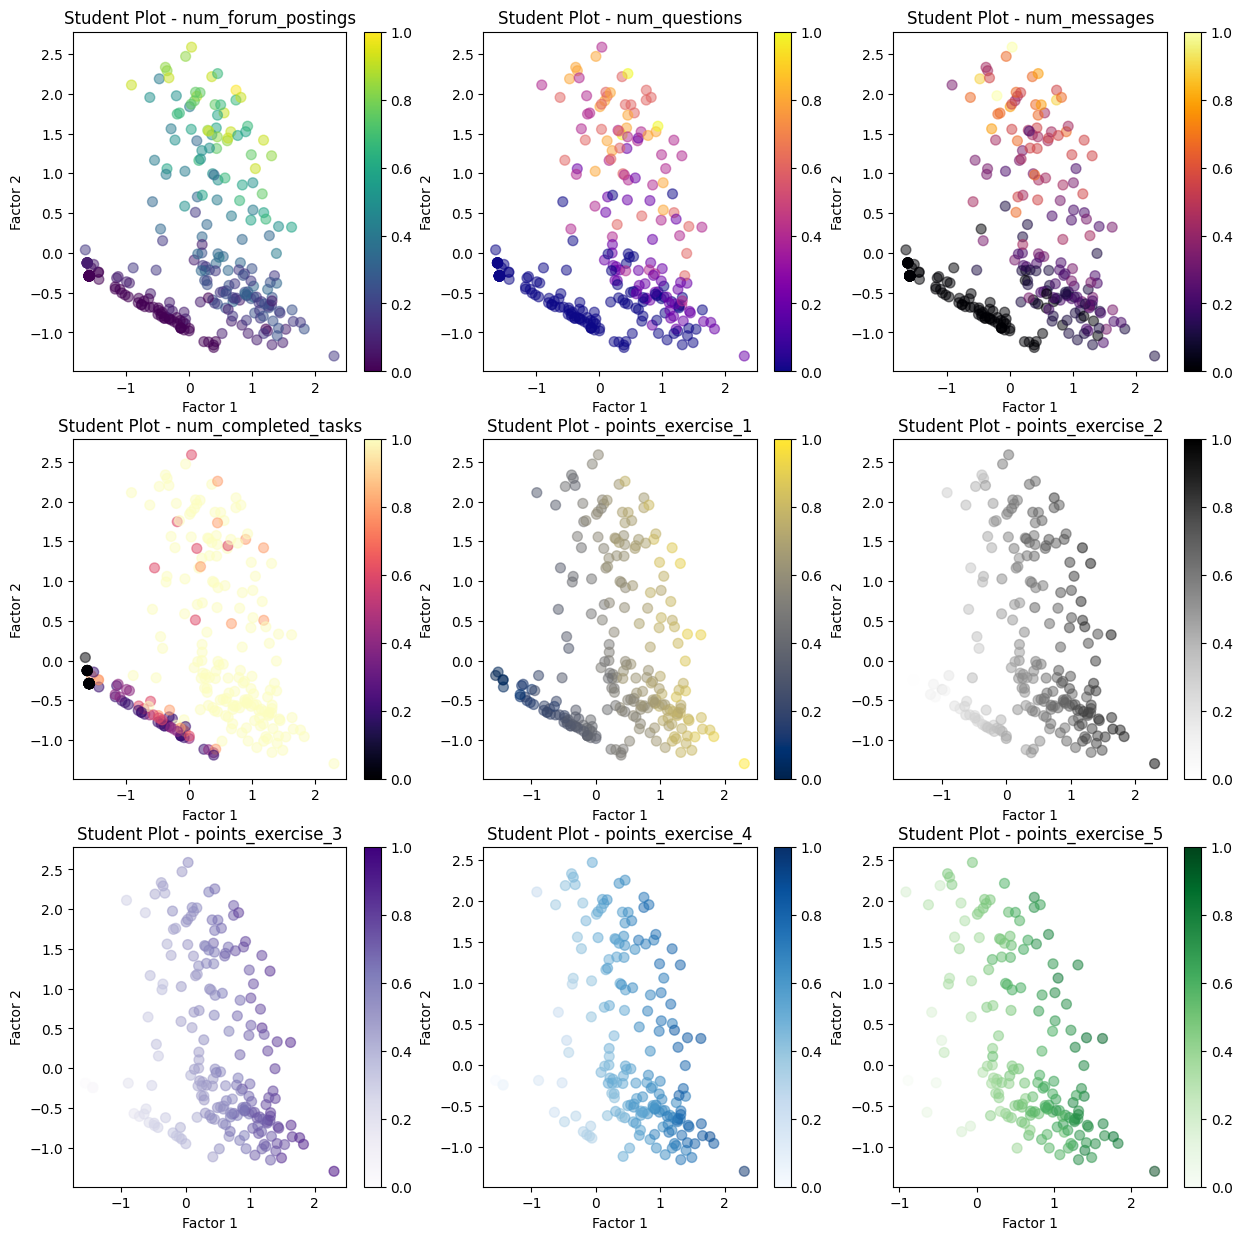

In [70]:
# perform the factor analysis
fa = FactorAnalysis(n_components=2, rotation='varimax')
fa.fit(X_normalized)
X_transformed_fa = fa.transform(X_normalized)

# create a list of color maps
color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

# create a figure with 9 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# loop over the features and the subplots
for i in range(9):
    # get the row and column index of the subplot
    row = i // 3
    col = i % 3
    # get the color values and the color map for the current feature
    color_values = X[:, i]
    color_map = plt.cm.get_cmap(color_maps[i])
    # plot the data with the color values and the color map on the subplot
    axes[row, col].scatter(X_transformed_fa[:, 0], X_transformed_fa[:, 1], c=color_values, cmap=color_map, alpha=0.5, s=50)
    # add a color bar to show the scale
    fig.colorbar(plt.cm.ScalarMappable(cmap=color_map), ax=axes[row, col])
    # add labels and a title to the subplot
    axes[row, col].set_xlabel('Factor 1')
    axes[row, col].set_ylabel('Factor 2')
    axes[row, col].set_title(f'Student Plot - {features[i]}')

# show the figure
plt.show()

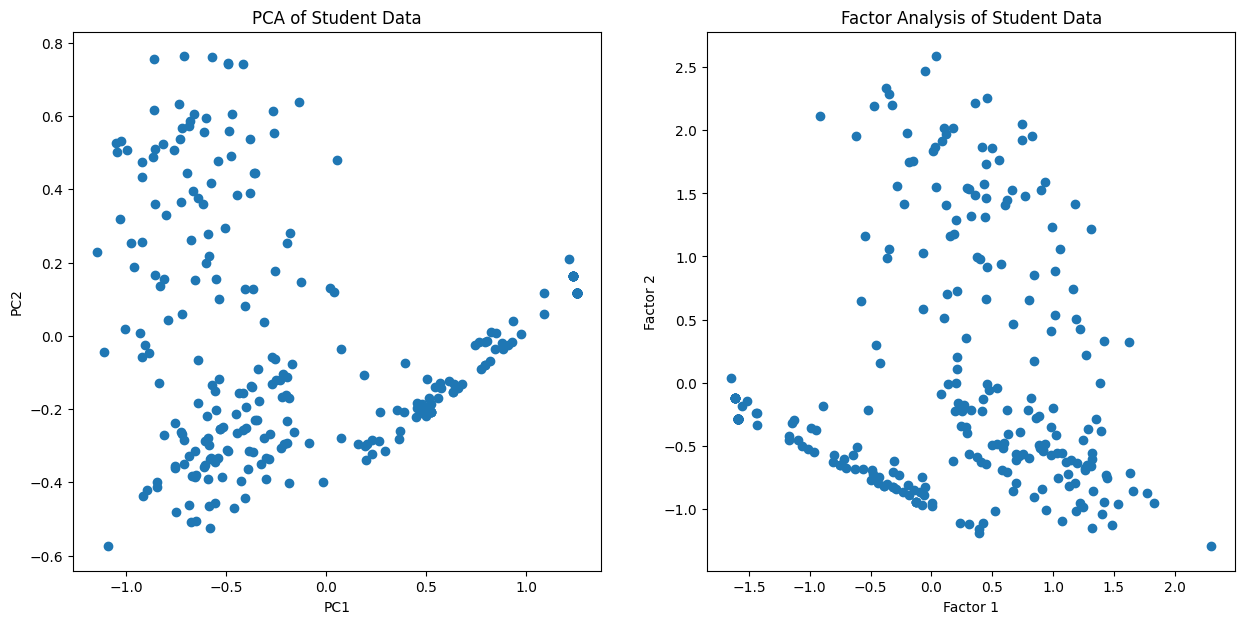

In [71]:
# create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# plot the data from the PCA on the first subplot
axes[0].scatter(X_transformed[:, 0], X_transformed[:, 1])
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('PCA of Student Data')

# plot the data from the FA on the second subplot
axes[1].scatter(X_transformed_fa[:, 0], X_transformed_fa[:, 1])
axes[1].set_xlabel('Factor 1')
axes[1].set_ylabel('Factor 2')
axes[1].set_title('Factor Analysis of Student Data')

# show the figure
plt.show()


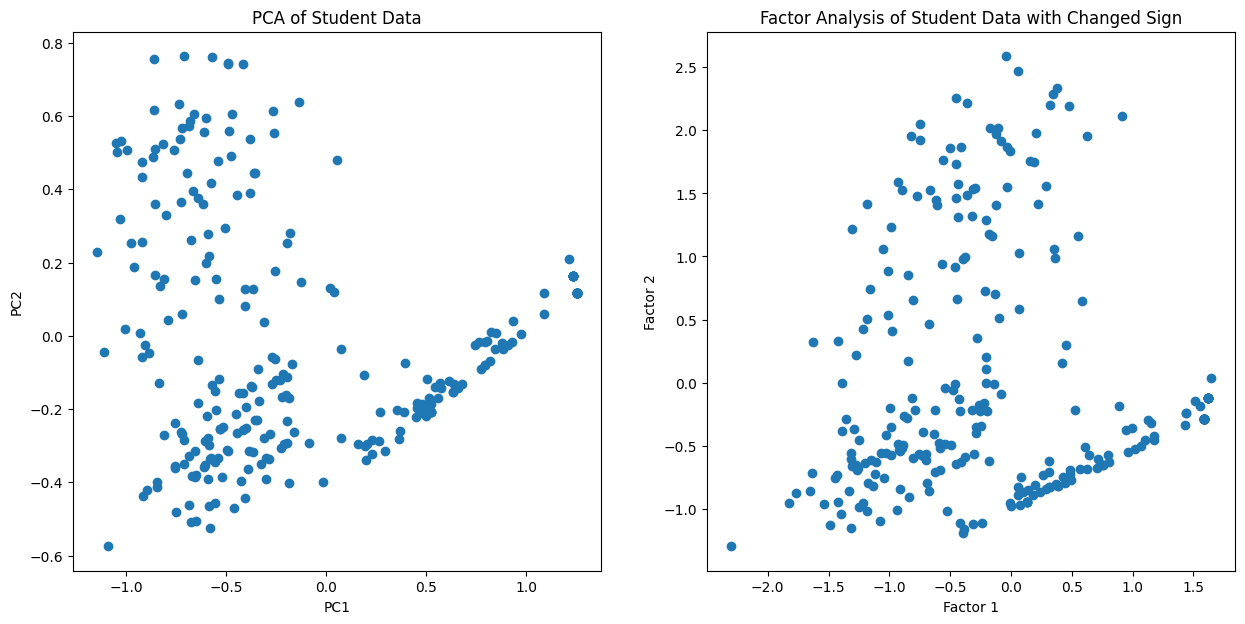

In [72]:
# create a copy of the transformed data from the factor analysis with the opposite sign on the first column
X_transformed_fa_neg = X_transformed_fa.copy()
X_transformed_fa_neg[:, 0] = np.negative(X_transformed_fa_neg[:, 0])

# create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# plot the data from the PCA on the first subplot
axes[0].scatter(X_transformed[:, 0], X_transformed[:, 1])
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('PCA of Student Data')

# plot the data with the changed sign
plt.scatter(X_transformed_fa_neg[:, 0], X_transformed_fa_neg[:, 1])
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis of Student Data with Changed Sign')
plt.show()


I flipped the factor analysis graph to make visual comparing them easier. 
The plots are mirrored along the y-axis because the PCA and the FA models have different signs for the components or the factors. The sign of the component or the factor does not affect the interpretation of the results, as it is arbitrary and depends on the algorithm. 
The plots look very similar this is because both PCA and FA are dimensionality reduction techniques that try to find the best linear combination of the original variables to represent the data. 
Both PCA and FA use the eigendecomposition of the covariance matrix to find the components or the factors, and both PCA and FA can be interpreted as the projection of the data onto a lower-dimensional subspace. 
The main difference between PCA and FA is the assumption and the goal of the analysis. 
PCA assumes that all the variance in the data is due to the components, and the goal is to find the components that explain the most total variance in the data. 
FA assumes that some of the variance in the data is due to the factors and some is due to the error, and the goal is to find the factors that explain the most common variance in the data. 

Factor analysis (FA) is a statistical technique that tries to find the underlying factors that explain the patterns of correlation among the observed variables. FA assumes that each observed variable is a linear combination of some common factors and some unique factors. The common factors are the latent variables that influence multiple observed variables, and the unique factors are the error terms that capture the variance that is specific to each observed variable. The goal of FA is to find the number and the nature of the common factors, and to estimate the factor loadings, which are the coefficients that indicate how much each observed variable is influenced by each common factor.
For example, suppose we have a data set of 80 students with nine observed variables: the number of forum postings, questions, messages, completed tasks, and the points on five exercises. We can use FA to find out if there are some common factors that explain the variation of these variables across the students. We can also use FA to reduce the dimensionality of the data by transforming the nine variables into a smaller number of factors.
To perform FA, we need to make some assumptions and decisions. One of the assumptions is that the observed variables are normally distributed and have a linear relationship with the common factors. Another assumption is that the common factors are independent of each other and have a unit variance. A third assumption is that the unique factors are independent of each other and of the common factors, and have a constant variance for each observed variable.



Therefore, the plots look very similar, but they have different meanings and implications.

### Task 02.07


Print the `components_` property of the factor analysis model. For both factors, report which features/columns of the data have high weights.

Print the factors found by the factor analysis using `print(model.components_)`. Try to interpret both factors. What does the first factor represent? What does the second factor represent?

In [76]:
# print the components property
print("Components:")
print(fa.components_)

Components:
[[0.11703187 0.09086351 0.0932999  0.33418737 0.27715195 0.2760629
  0.26329229 0.26347569 0.26832181]
 [0.21847961 0.19309129 0.17895348 0.11021114 0.05045514 0.04984632
  0.04727654 0.0480017  0.05404447]]


This array shows the factor loadings for each observed variable (we have 9 different ones) and each common factor (the latent variables that influence multiple observed variables). The factor loadings range from 0.090 to 0.334 in the first factor and 0.047 to 0.218 in the second factor, where a positive value means a positive correlation, a negative value means a negative correlation, and a zero value means no correlation. The higher the absolute value of the factor loading, the stronger the influence of the common factor on the observed variable.
For both factors (the two printed arrays), we can report which features/columns of the data have high weights by looking at the absolute values of the factor loadings. 

We can use a threshold of 0.2 since there ar values in booth arrays which are higher than this.



In [77]:
# define a threshold for high weights
threshold = 0.2

# loop over the factors
for i in range(2):
    # get the factor loadings for the current factor
    factor_loadings = fa.components_[i, :]
    # get the features that have high weights for the current factor
    high_weight_features = np.where(np.abs(factor_loadings) > threshold)[0]
    # print the features that have high weights for the current factor
    print(f'For factor {i + 1}, the features that have high weights are:')
    for j in high_weight_features:
        print(f'- {features[j]}')


For factor 1, the features that have high weights are:
- num_completed_tasks
- points_exercise_1
- points_exercise_2
- points_exercise_3
- points_exercise_4
- points_exercise_5
For factor 2, the features that have high weights are:
- num_forum_postings


Factor 1 has a high weight for the number of completed tasks and the points on the exercises. This means that factor 1 is strongly related to these variables, and it explains a lot of their variation across the data points. The corresponding plots displays a colorful change for example on all the exercise-plots you see the colour get stronger along factor 2 from left to right. 
Factor 2 has a high weight for the number of forum postings. This means that factor 2 is strongly related to this variable. You can see this well in the colourful plots. The "forum postings"-plot displays a colorful change along factor 2. 

## Clustering

### Task 02.08

Using `sklearn.cluster.KMeans`, perform cluster analyses of the data for `n_clusters` between 2 and 10. For each value of `n_clusters`, compute the `sklearn.metrics.silhouette_score`. Provide a plot of the silhouette score on the y axis and `n_clusters` on the x axis. Report which value for `n_clusters` is best according to this analysis.

**HINT:** The `silhouette_score` function requires the cluster labels as second argument. You can retrieve the cluster labels from a fitted `KMeans` model via the `predict` function.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# this cell is here for test purposes. please ignore it. 

YOUR ANSWER HERE

### Task 02.09

Using `sklearn.cluster.KMeans`, perform a cluster analysis of the data with `n_clusters = 2`. Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.10 (bonus task)

Repeat the cluster analysis, but perform it on the latent representation according to factor analysis. Plot the new clustering. Check if it is consistent with the plot above.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.11 (bonus task)

Implement $K$-Means yourself. Check if your result is consistent with the result provided by the `sklearn` implementation.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Gaussian Mixture Models

### Task 02.12

Using `sklearn.mixture.GaussianMixture`, perform cluster analyses of the data with `n_components` between 2 and 10. For each cluster analysis, compute the `bic` function value of the model (this is the Bayesian information criterion). Provide a plot of the bic value on the y axis with `n_components` on the x axis.

Report which value for `n_components` is best according to this analysis.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.13

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the data with `n_components = 2`. Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.14

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the latent space representation according to factor analysis with `n_components = 3`. Provide a scatter plot, where the color of each point represents the cluster membership.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# this cell is here for test purposes. please ignore it. 

### Task 02.15

Print the mean feature values for each cluster. Try to interpret the clusters: What are the mean differences between the clusters? How would you name each cluster?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Task 02.16

Recall the equation for the expected negative log likelihood in a Gaussian mixture model from the lecture:

\begin{align*}
Q = &\sum_{i=1}^N \sum_{k=1}^K -\gamma_{k,i} \log\Big[ p_{X|Z}(x_i|k) \cdot p_Z(k) \Big]\\
=& \sum_{i=1}^N \sum_{k=1}^K \gamma_{k,i} \Big(\frac{1}{2}\log[2\pi \det(\Sigma_k)] + \frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) - \log[p_Z(k)]\Big)
\end{align*}

Assuming that $Q$ is convex, find the optimal values for $\mu_k$ and $\Sigma_k$

**HINT:** You may use the following general matrix/vector gradient equations (refer to the [matrix cook book by Peterson and Pedersen (2012), p.10-11](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) :
\begin{align*}
\nabla_x (x - y)^T W (x - y) &= 2 W (x-y) \\
\nabla_W (x - y)^T W (x - y) &= (x-y)(x-y)^T \\
\nabla_{W^{-1}} \log[\det(W)] &= -W & \text{if $W$ is symmetric and positive semi-definite}
\end{align*}

YOUR ANSWER HERE